In [1]:
#Bibliotecas:
from FKM import *
from IKM import *
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20

In [2]:
#Modelo Cinemático Direto:
six = Robot()
six.addNonDHLine(0, 0, l2, rad(180), 0, 0)
six.addDHLine(theta1, 0, l1, rad(90))
six.addDHLine(theta2-rad(90), 0, l3, rad(180))
six.addDHLine(theta3+rad(90), 0, l4, -rad(90))
six.addDHLine(theta4, -l5, 0, -rad(90))
six.addDHLine(theta5, 0, 0, rad(90))
six.addDHLine(theta6, -l6, 0, 0)
six.addNonDHLine(0, 0, 0, rad(180), 0, rad(180))
links_list = [150, 450, 590, 130, 647.07, 95]
six.HTM(0, 8)

⎡-c₆⋅(c₁⋅s₅⋅s_{(2-3)} + c₅⋅(-c₁⋅c₄⋅c_{(2-3)} + s₁⋅s₄)) - s₆⋅(c₁⋅c_{(2-3)}⋅s₄ + ↪
⎢                                                                              ↪
⎢-c₆⋅(c₅⋅(c₁⋅s₄ + c₄⋅c_{(2-3)}⋅s₁) - s₁⋅s₅⋅s_{(2-3)}) + s₆⋅(-c₁⋅c₄ + c_{(2-3)} ↪
⎢                                                                              ↪
⎢               -c₆⋅(c₄⋅c₅⋅s_{(2-3)} + c_{(2-3)}⋅s₅) + s₄⋅s₆⋅s_{(2-3)}         ↪
⎢                                                                              ↪
⎣                                         0                                    ↪

↪  c₄⋅s₁)  c₆⋅(c₁⋅c_{(2-3)}⋅s₄ + c₄⋅s₁) - s₆⋅(c₁⋅s₅⋅s_{(2-3)} + c₅⋅(-c₁⋅c₄⋅c_{ ↪
↪                                                                              ↪
↪ ⋅s₁⋅s₄)  -c₆⋅(-c₁⋅c₄ + c_{(2-3)}⋅s₁⋅s₄) - s₆⋅(c₅⋅(c₁⋅s₄ + c₄⋅c_{(2-3)}⋅s₁) - ↪
↪                                                                              ↪
↪                         -c₆⋅s₄⋅s_{(2-3)} - s₆⋅(c₄⋅c₅⋅s_{(2-3)} + c_{(2-3)}⋅s ↪
↪                          

In [3]:
#Pontos para validação:
test_points = [
    [-135, -90, -45, 0, 45, 90, 135],
    [0, 30, 90],
    [-135, -90, -45, 0],
    [-135, -90, -45, 0, 45, 90, 135],
    [-120, -90, -45, 0],
    [-135, -90, -45, 0, 45, 90, 135]
]

#Verifica se existe um arquivo de dados:
try:
    data = np.load('validation.npy')
except:
    data = []

    #Loop de validação iterativo:
    for t1 in test_points[0]:
        for t2 in test_points[1]:
            for t3 in test_points[2]:
                for t4 in test_points[3]:
                    for t5 in test_points[4]:
                        for t6 in test_points[5]:
                            #Configuração articular de teste:
                            testconfig = np.radians(np.array([t1, t2, t3, t4, t5, t6]))
                            #Pose calculada pela cinemática direta:
                            pose_FKM = np.array(six.POSE(testconfig, links_list), dtype=np.float64)
                            #Ângulos obtidos pela cinemática inversa:
                            angles = getAngles(pose_FKM)
                            #Retroalimentação da cinemática direta com os ângulos obtidos na inversa:
                            pose_IKM = np.array(six.POSE(angles, links_list), dtype=np.float64)
                            #Comparação (elemento por elemento) entre as matrizes homogêneas obtidas:
                            valid = True
                            erro_orient = []
                            erro_pos = []
                            for i in np.arange(0, 3, 1):
                                for j in np.arange(0, 4, 1):
                                    error = (pose_IKM[i][j]-pose_FKM[i][j])
                                    if(j==3):
                                        valid = bool(valid and bool(abs(error) < 1e-1))
                                        erro_pos.append(error)
                                    else:
                                        valid = bool(valid and bool(abs(error) < 1e-2))
                                        erro_orient.append(error)
                            ep = np.mean(np.array(erro_pos))
                            eo = np.mean(np.array(erro_orient))                                        
                            #Alerta de sucesso ou falha do teste:
                            if valid:
                                print(f'({t1},{t2},{t3},{t4},{t5},{t6}) \t → \t OK\n')
                            else:
                                print(f'({t1},{t2},{t3},{t4},{t5},{t6}) \t → \t NOK \t → IKM:({round(np.degrees(angles[0]),2)},{round(np.degrees(angles[1]),2)},{round(np.degrees(angles[2]),2)},{round(np.degrees(angles[3]),2)},{round(np.degrees(angles[4]),2)},{round(np.degrees(angles[5]),2)})\n')
                                print(pose_FKM)
                                print(pose_IKM)
                            #Salva os dados:
                            data.append([pose_FKM[0][3], pose_FKM[1][3], pose_FKM[2][3], valid, ep, eo, t1, t2, t3, t4, t5, t6])
    #Salva os dados em arquivo:
    data = np.array(data)
    np.save('validation.npy', data)

(-135,0,-135,-135,-120,-135) 	 → 	 OK

(-135,0,-135,-135,-120,-90) 	 → 	 OK

(-135,0,-135,-135,-120,-45) 	 → 	 OK

(-135,0,-135,-135,-120,0) 	 → 	 OK

(-135,0,-135,-135,-120,45) 	 → 	 OK

(-135,0,-135,-135,-120,90) 	 → 	 OK

(-135,0,-135,-135,-120,135) 	 → 	 OK

(-135,0,-135,-135,-90,-135) 	 → 	 OK

(-135,0,-135,-135,-90,-90) 	 → 	 OK

(-135,0,-135,-135,-90,-45) 	 → 	 OK

(-135,0,-135,-135,-90,0) 	 → 	 OK

(-135,0,-135,-135,-90,45) 	 → 	 OK

(-135,0,-135,-135,-90,90) 	 → 	 OK

(-135,0,-135,-135,-90,135) 	 → 	 OK

(-135,0,-135,-135,-45,-135) 	 → 	 OK

(-135,0,-135,-135,-45,-90) 	 → 	 OK

(-135,0,-135,-135,-45,-45) 	 → 	 OK

(-135,0,-135,-135,-45,0) 	 → 	 OK

(-135,0,-135,-135,-45,45) 	 → 	 OK

(-135,0,-135,-135,-45,90) 	 → 	 OK

(-135,0,-135,-135,-45,135) 	 → 	 OK

(-135,0,-135,-135,0,-135) 	 → 	 OK

(-135,0,-135,-135,0,-90) 	 → 	 OK

(-135,0,-135,-135,0,-45) 	 → 	 OK

(-135,0,-135,-135,0,0) 	 → 	 OK

(-135,0,-135,-135,0,45) 	 → 	 OK

(-135,0,-135,-135,0,90) 	 → 	 OK

(-135,0,-135,-135,

In [4]:
#Decupagem dos vetores:
x = data[:,0]
y = data[:,1]
z = data[:,2]
v = data[:,3]
ep = data[:,4]
eo = data[:,5]

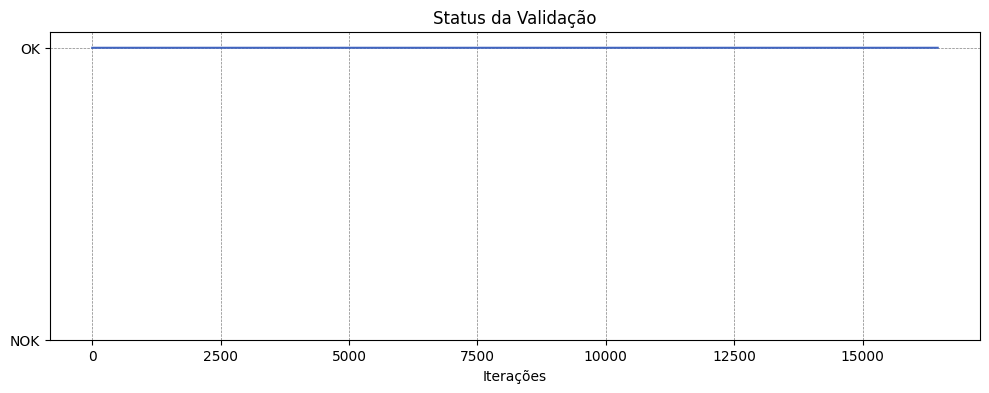

In [5]:
plt.rcParams['figure.figsize'] = (12, 4)
plt.figure()
plt.title('Status da Validação')
plt.plot(np.arange(0, len(v), 1), v, color='C0')
plt.xlabel('Iterações')
plt.yticks([0, 1], ['NOK', 'OK'])
plt.show()

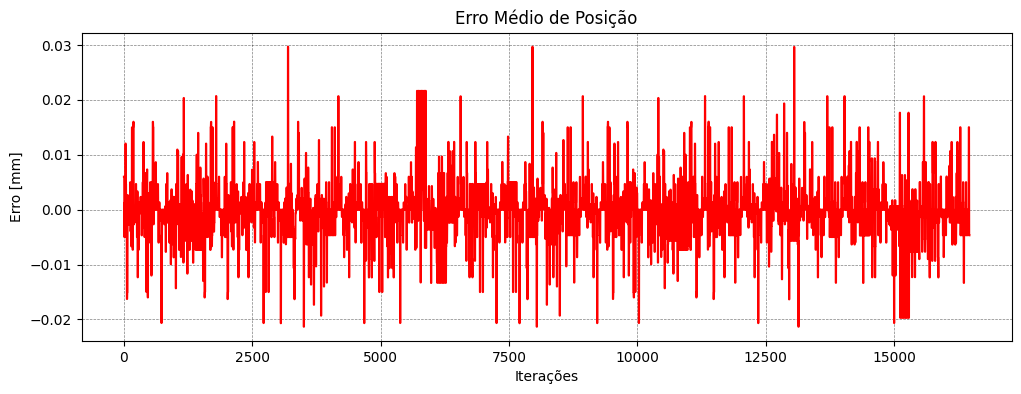

In [6]:
plt.rcParams['figure.figsize'] = (12, 4)
plt.figure()
plt.title('Erro Médio de Posição')
plt.plot(np.arange(0, len(v), 1), ep, color='r')
plt.ylabel('Erro [mm]')
plt.xlabel('Iterações')
plt.show()

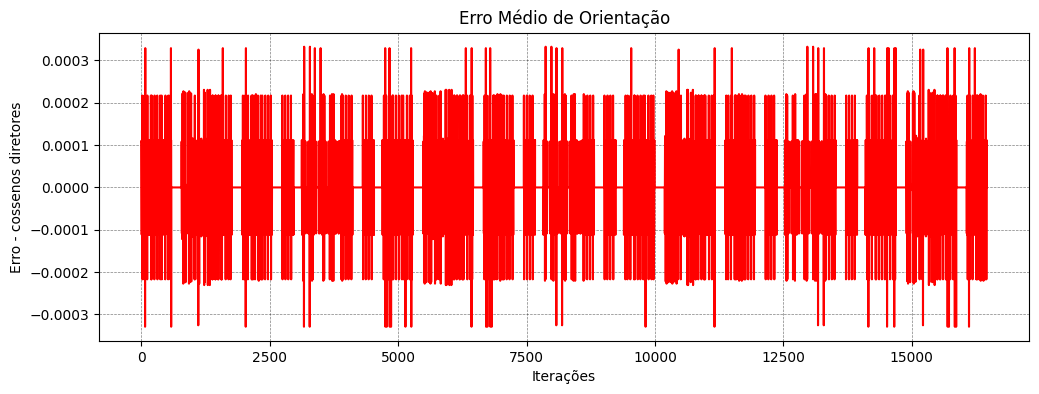

In [7]:
plt.rcParams['figure.figsize'] = (12, 4)
plt.figure()
plt.title('Erro Médio de Orientação')
plt.plot(np.arange(0, len(v), 1), eo, color='r')
plt.ylabel('Erro - cossenos diretores')
plt.xlabel('Iterações')
plt.show()

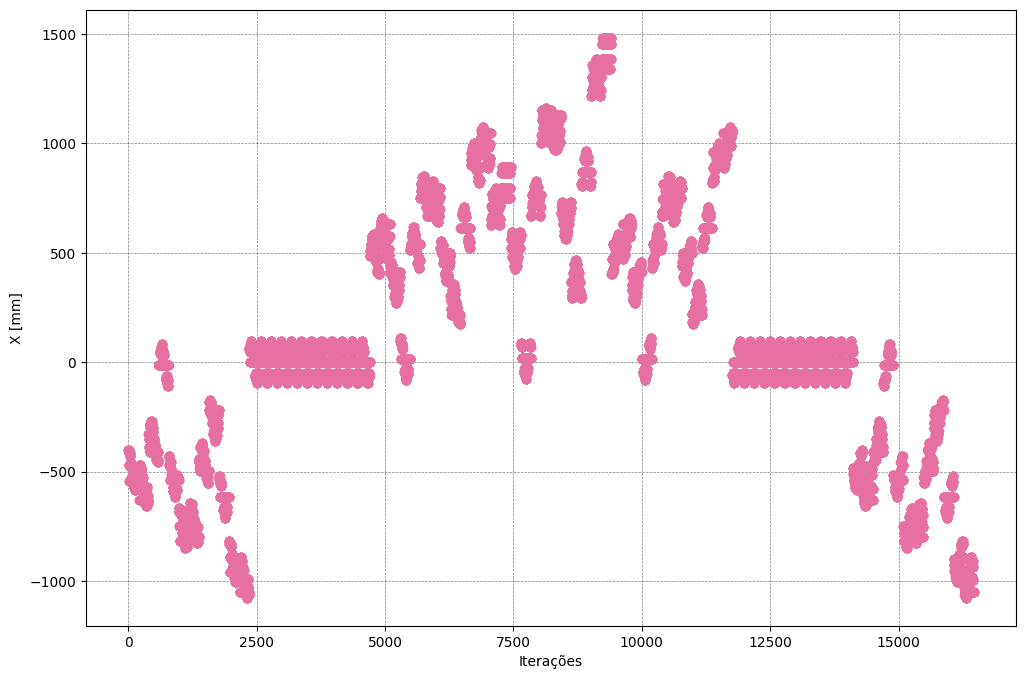

In [8]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure()
plt.scatter(np.arange(0, len(v), 1), x, color='C1')
plt.ylabel('X [mm]')
plt.xlabel('Iterações')
plt.show()

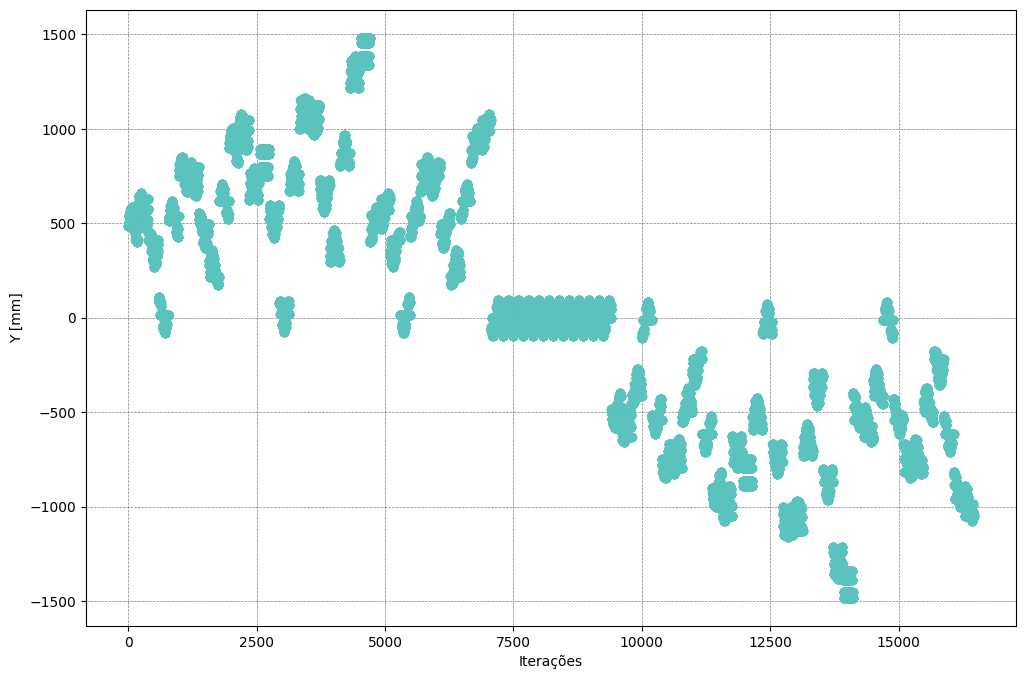

In [9]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure()
plt.scatter(np.arange(0, len(v), 1), y, color='C2')
plt.ylabel('Y [mm]')
plt.xlabel('Iterações')
plt.show()

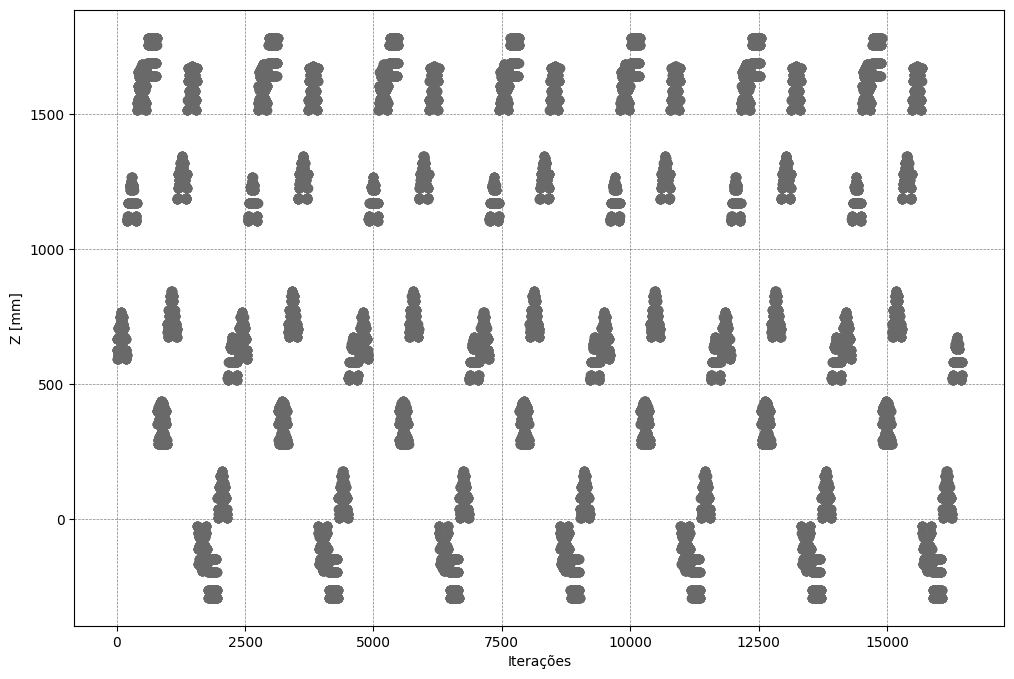

In [10]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure()
plt.scatter(np.arange(0, len(v), 1), z, color='C3')
plt.ylabel('Z [mm]')
plt.xlabel('Iterações')
plt.show()

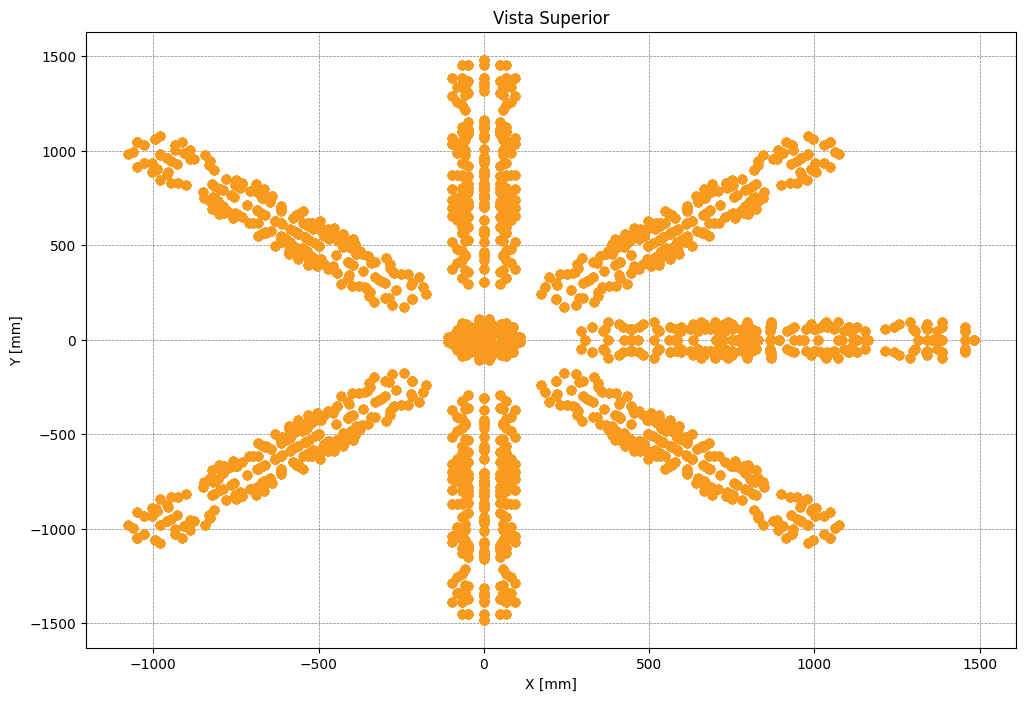

In [11]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure()
plt.title('Vista Superior')
plt.scatter(x, y, color='C4')
plt.ylabel('Y [mm]')
plt.xlabel('X [mm]')
plt.show()

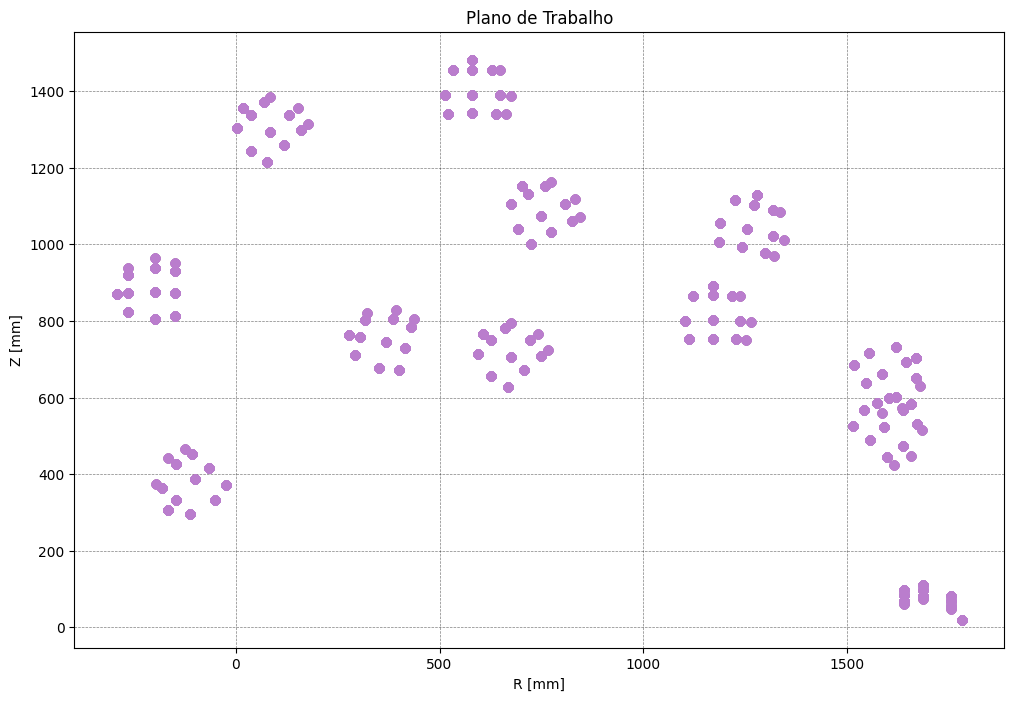

In [12]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure()
plt.title('Plano de Trabalho')
plt.scatter(z, np.sqrt(np.pow(x,2)+np.pow(y,2)), color='C5')
plt.ylabel('Z [mm]')
plt.xlabel('R [mm]')
plt.show()